   
WarmUp
=======

Trend-Seasonal
=======
**Times series course**  
IMT Mines ALES  
2IA - 2022



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [15, 5]

## Chickenpox

Create a panda data frame from the file `chickenpox.txt` and convert it to a panda dataframe with time indexed monthly from 1931 to 1972. 

In [2]:
#On construit nos données brutes
df = pd.read_csv('../data/chickenpox.txt', header = 0, names =['Cases of chickenpox'])
print("\n",df)

#On crée le vecteur temporel mensuel de la taille des données brutes
time_index = pd.date_range('1931 Jan 1', periods = len(df), freq ='M')
print(time_index)

#L'index de notre df correspond au vecteur temporel
df.index = time_index
df.head()


      Cases of chickenpox
0                    956
1                    927
2                   1585
3                   1536
4                   1448
..                   ...
493                  463
494                  690
495                  847
496                 1121
497                 1048

[498 rows x 1 columns]
DatetimeIndex(['1931-01-31', '1931-02-28', '1931-03-31', '1931-04-30',
               '1931-05-31', '1931-06-30', '1931-07-31', '1931-08-31',
               '1931-09-30', '1931-10-31',
               ...
               '1971-09-30', '1971-10-31', '1971-11-30', '1971-12-31',
               '1972-01-31', '1972-02-29', '1972-03-31', '1972-04-30',
               '1972-05-31', '1972-06-30'],
              dtype='datetime64[ns]', length=498, freq='M')


,Cases of chickenpox
1931-01-31,956
1931-02-28,927
1931-03-31,1585
1931-04-30,1536
1931-05-31,1448


Plot the data. Could you see any trend or seasonality? You can zoom or resample the data.

<AxesSubplot:>

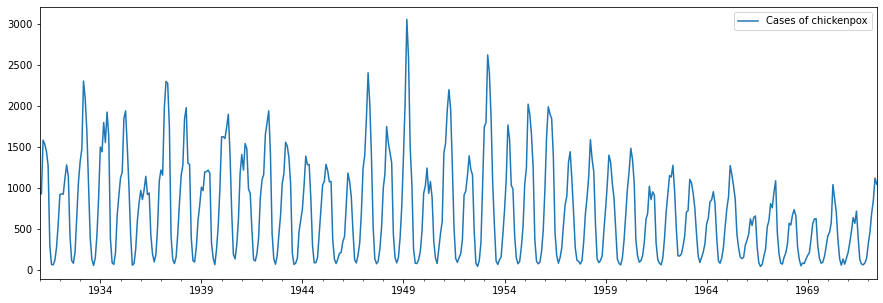

In [3]:
df.plot()
#Pas de tendance excepté le fait que le nombre de cas diminue à partir de 1953
#Saisonnalité : il y a un pic au début de chaque année 

<AxesSubplot:>

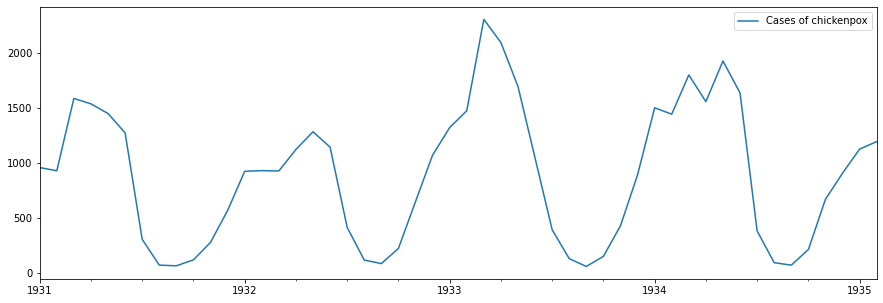

In [4]:
#Zoom
df[0:50].plot() #On se focalise sur les 51 premières valeurs de notre df

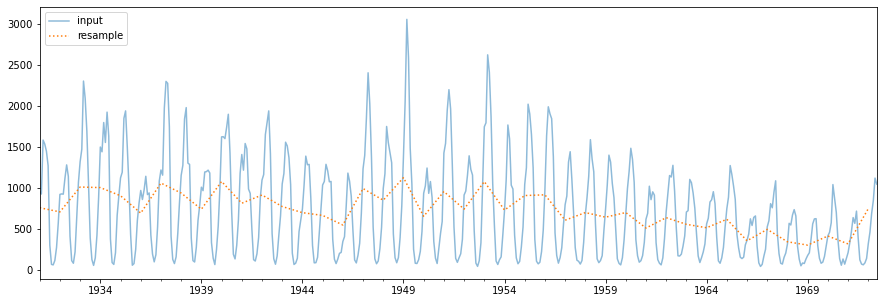

In [5]:
#Resample
#df.resample('BA').mean().plot()
#Explication du 'BA' : https://stackoverflow.com/questions/17001389/pandas-resample-documentation

#df['1954':].resample('BA').mean().plot()

# Correction

# Resample the data and plot on the same figure
ax = df.plot(alpha=0.5, style='-')

df.resample('BA').mean().plot(style=':', ax = ax)

plt.legend(['input', 'resample'], loc='upper left');

# -> It seems there is a global decreasing trend.

What is the average number of cases for each month?

In [6]:
avg_death = (df['Cases of chickenpox'].sum())/len(df)
print("Il y a en moyenne ", avg_death, " morts par mois")
#print(df['Cases of chickenpox'].mean())

Il y a en moyenne  732.4076305220883  morts par mois


Plot the autocorrelation function (you can use pandas).   
Interpret the results. What mean the dotted lines?


In [7]:
df['Cases of chickenpox'].autocorr()  

0.8397737952532476

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

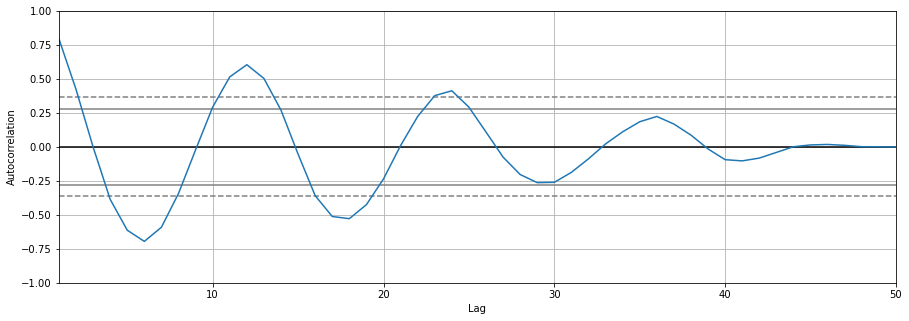

In [7]:
#Ou sinon : from pandas.plotting import autocorrelation_plot et ensuite autocorrelation_plot(df)
pd.plotting.autocorrelation_plot(df[0:50])
#pd.plotting.autocorrelation_plot(df[0:50]) #On observe une période de 12 donc 1 an, la série se répète chaque année 
#Les lignes en pointillé indiquent que les valeurs sont pas significatives 
#Le lag correspond au décalage (h), on calcule à chaque h

#Autocorrelation c'est la série * la série retardée (d'un décalage h)
#Une courbe fait apparaître la tendance et l'autre la saisonnalité
#On a aussi la moyenne, la variance ou l'autocovariance d'un point de vue statistique
#En analyse visuelle on a le zoom et le resample
#En traitement on a la moyenne glissante ou la différenciation

# The horizontal lines in the plot correspond to 95% and 99% confidence bands.
# The dashed line is 99% confidence band.
# The output plot is perdiodic (period ~ 12 months). It confirms that there is a seasonality.

Plot on the same graph a twelve month's time series of each year.

In [9]:
df['Month'] = df.index.month #Vient lire notre index qui est une date, et récupère le mois
df['Year'] = df.index.year
df

,Cases of chickenpox,Month,Year
1931-01-31,956,1,1931
1931-02-28,927,2,1931
1931-03-31,1585,3,1931
1931-04-30,1536,4,1931
1931-05-31,1448,5,1931
...,...,...,...
1972-02-29,463,2,1972
1972-03-31,690,3,1972
1972-04-30,847,4,1972
1972-05-31,1121,5,1972


Cases of chickenpox                                                  \
Year                 1931    1932    1933    1934    1935    1936    1937   
Month                                                                       
1                   956.0   922.0  1320.0  1500.0  1124.0   970.0  1220.0   
2                   927.0   928.0  1473.0  1442.0  1192.0   860.0  1157.0   
3                  1585.0   925.0  2305.0  1799.0  1850.0   977.0  1974.0   
4                  1536.0  1121.0  2094.0  1556.0  1941.0  1143.0  2301.0   
5                  1448.0  1282.0  1694.0  1926.0  1505.0   920.0  2277.0   

                               ...                                       \
Year     1938    1939    1940  ...    1963   1964    1965   1966   1967   
Month                          ...                                        
1      1154.0  1010.0  1624.0  ...   707.0  561.0   746.0  362.0  526.0   
2      1277.0   968.0  1626.0  ...   724.0  631.0   889.0  438.0  601.0   
3      1841.0  1195.0  1603.0  ...  1105.0  829.0  1274.0  624.0  809.0   
4      1981.0  1200.0  1740.0  ...  1065.0  857.0  1164.0  543.0  759.0   
5      1304.0  1218.0  1900.0  ...   938.0  955.0  1024.0  642.0  950.0   

                                            
Year    1968   1969    1970   1971    1972  
Month                                       
1      316.0  177.0   416.0  211.0   320.0  
2      569.0  210.0   459.0  331.0   463.0  
3      549.0  372.0   576.0  471.0   690.0  
4      671.0  562.0  1042.0  639.0   847.0  
5      736.0  623.0   873.0  569.0  1121.0  

[5 rows x 42 columns]

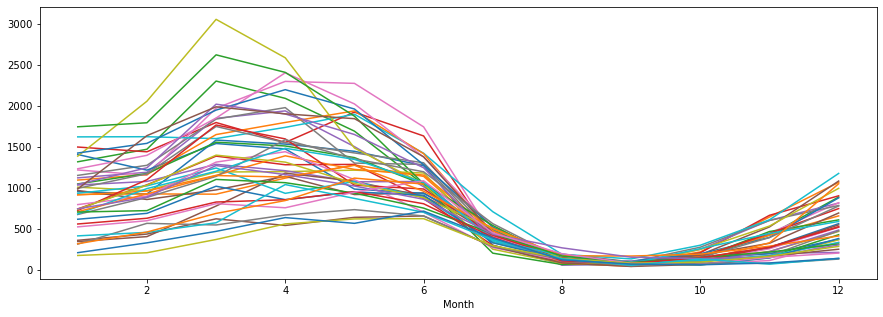

In [14]:
pivot = pd.pivot_table(df, index = ['Month'], columns = ['Year'])
#pd.pivot_table crée un tableau dont les index sont les mois et les colonnes sont les années

pivot.plot(legend = None) #Nombre de cas PAR mois POUR chaque année
pivot.head()

Plot the global trend of the number of cases for each year.

In [16]:
df = df.drop(['Month','Year'], axis = 1) #On met df = df pour garder en mémoire la modification
df

,Cases of chickenpox
1931-01-31,956
1931-02-28,927
1931-03-31,1585
1931-04-30,1536
1931-05-31,1448
...,...
1972-02-29,463
1972-03-31,690
1972-04-30,847
1972-05-31,1121


<AxesSubplot:>

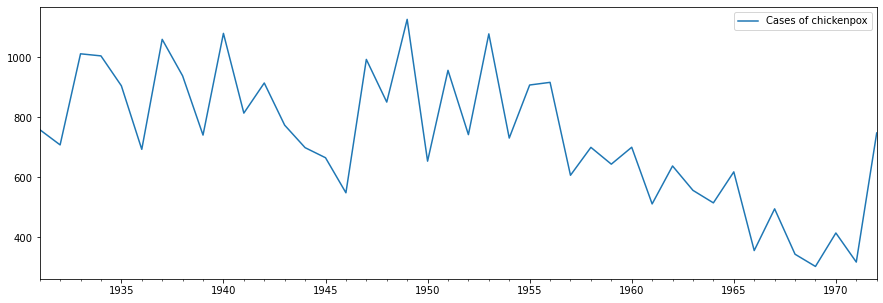

In [17]:
#global trend
# Correction

df.resample('BA').mean().plot() # resample reports the average of the previous year

## Analyse trend and seasonal with built in functions

Plot a seasonal decomposition using moving averages. You can use the `statsmodels` toolbox. Is there a specific time where the model does not fit well the data?

In [18]:
df

,Cases of chickenpox
1931-01-31,956
1931-02-28,927
1931-03-31,1585
1931-04-30,1536
1931-05-31,1448
...,...
1972-02-29,463
1972-03-31,690
1972-04-30,847
1972-05-31,1121


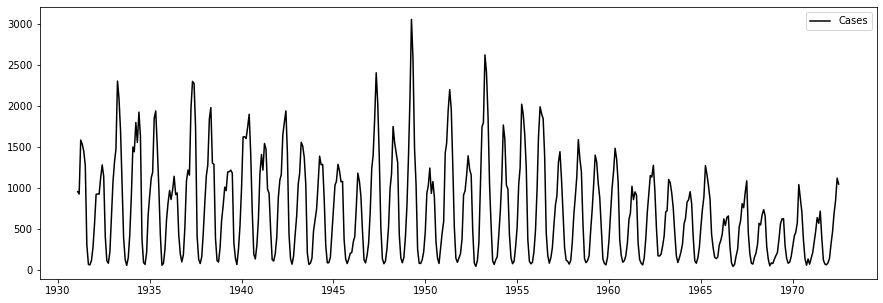

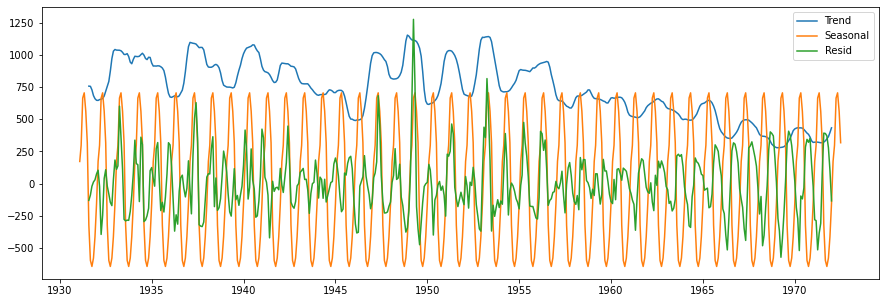

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Correction

# Seasonal decomposition using moving averages.
decomposition = seasonal_decompose(df.values, period=12) 

plt.plot(df.index, df.values, 'k')
plt.legend(['Cases'])
plt.figure()
plt.plot(df.index,decomposition.trend)
plt.plot(df.index,decomposition.seasonal)
plt.plot(df.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])

# The residual component is particularly high in 1950. is there anything special this year?

How does the seasonal decomposition using moving averages works in the `statsmodels` toolbox?

**Correction**

The results are obtained by first estimating the trend by applying a convolution filter to the data. The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.